In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten

ImportError: cannot import name 'layers' from 'keras.models' (d:\practice\surface_defect_detection\venv\lib\site-packages\keras\models\__init__.py)

In [20]:
train_data = image_dataset_from_directory(
    directory="../data/raw/train/images",
    label_mode = 'categorical',
    color_mode='rgb',
    image_size=(200, 200),
    batch_size=32
)

test_data = image_dataset_from_directory(
    directory="../data/raw/validation/images",
    label_mode = 'categorical',
    color_mode='rgb',
    image_size=(200, 200),
    batch_size=32
)

Found 1440 files belonging to 6 classes.
Found 360 files belonging to 6 classes.


In [21]:
# NORMALIZING THE IMAGES

def normalize(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_input = train_data.map(normalize)
test_input = test_data.map(normalize)


In [37]:
# Data Augmentation
augment_step = Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomFlip("vertical"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1)
])

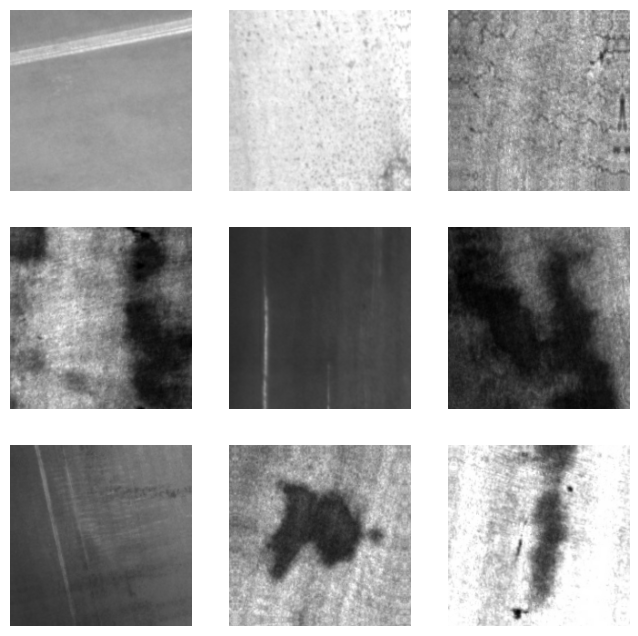

In [46]:
import matplotlib.pyplot as plt

for images, labels in train_input.take(1):
    augmented_images = augment_step(images)

    plt.figure(figsize=(8, 8))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i])
        plt.axis("off")
    plt.show()

In [48]:
model = Sequential()

model.add(keras.layers.Input(shape=(200,200,3)))

model.add(augment_step)

model.add(Conv2D(32,kernel_size=(3,3), strides=1, padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64,kernel_size=(3,3), strides=1, padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(128,kernel_size=(3,3), strides=1, padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dense(6, activation='softmax'))


In [49]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_13 (Sequential)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 200, 200, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │    10,240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,344,806 (39.46 MB)

 Trainable params: 10,344,358 (39.46 MB)

 Non-trainable params: 448 (1.75 KB)

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
history = model.fit(train_input, epochs = 20, validation_data=test_input)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.4729 - loss: 6.7310 - val_accuracy: 0.1722 - val_loss: 9.2952
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.5521 - loss: 2.7280 - val_accuracy: 0.2556 - val_loss: 17.2033
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6215 - loss: 1.8767 - val_accuracy: 0.2306 - val_loss: 17.0888
Epoch 4/20
 9/45 ━━━━━━━━━━━━━━━━━━━━ 1:13 2s/step - accuracy: 0.5768 - loss: 1.5173

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.plot()